In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np

In [2]:
data = pd.read_csv("../data/spotify_refined.csv", index_col=0)

data.head()

duration_ms  key  mode  time_signature  energy  valence  instrumentalness  \
0       204600    2     1             4.0   0.434    0.286          0.021900   
1       326933    1     1             4.0   0.359    0.588          0.006110   
2       185707    2     1             4.0   0.412    0.173          0.000234   
3       199413    5     1             4.0   0.338    0.230          0.510000   
4       392893    5     0             4.0   0.561    0.904          0.512000   

     tempo  loudness  
0  150.062    -8.795  
1  160.083   -10.401  
2   75.044    -7.148  
3   86.468   -15.236  
4  174.004   -11.648

# Features selection

In [3]:
sbn.pairplot(data=data)
plt.show()

Consider features pair: loudness, energy

In [4]:
loudness_data = data.values[:, -1]
energy_data = data.values[:, 4]

assert(len(loudness_data) == len(energy_data))

sample_size = len(loudness_data)

# Linear regression

### Manual approach

In [5]:
a_numerator = np.dot((energy_data - np.mean(energy_data)), (loudness_data - np.mean(loudness_data))) / sample_size
a_denominator = np.dot((loudness_data - np.mean(loudness_data)), (loudness_data - np.mean(loudness_data))) / sample_size

a = a_numerator / a_denominator

b = np.mean(energy_data) - np.mean(loudness_data) * a

print(f"{a=:.3f}, {b=:.3f}")

a=0.043, b=0.983


### Verification (using sklearn)

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=False).fit(loudness_data.reshape(-1, 1), energy_data)

print(f"{model.coef_[0]=:.3f}, {model.intercept_=:.3f}")

model.coef_[0]=0.043, model.intercept_=0.983


### Visualization 

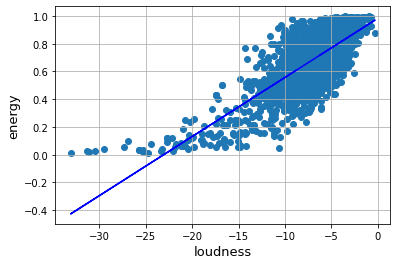

In [7]:
fig = plt.figure()
plt.scatter(loudness_data, energy_data)
plt.plot(loudness_data, a * loudness_data + b, color='b')

plt.grid()
plt.xlabel('loudness', size=13)
plt.ylabel('energy', size=13)
plt.show()

### Correlation coefficient

In [8]:
correlation_coefficient_numerator = np.dot((energy_data - np.mean(energy_data)), (loudness_data - np.mean(loudness_data))) / sample_size
correlation_coefficient_denomerator = np.std(loudness_data) * np.std(energy_data)

correlation_coefficient = correlation_coefficient_numerator / correlation_coefficient_denomerator

print(f'{correlation_coefficient=:.3f}')

correlation_coefficient=0.762


### Determinacy coefficient

In [9]:
determinacy_coefficient = np.power(correlation_coefficient, 2)

print(f'{determinacy_coefficient=:.3f}')

determinacy_coefficient=0.581


## Accuracy assessment

### Predictions on random rows

In [10]:
np.random.seed(23424)

In [11]:
rows_ids = np.random.choice(range(0, sample_size), 3)

print(f'{rows_ids=}')

rows_ids=array([383, 208, 627])


In [12]:
predicted_values = [a * loudness_data[row_id] + b for row_id in rows_ids]
expected_values = [energy_data[row_id] for row_id in rows_ids]

print(f'{predicted_values=}')
print(f'{expected_values=}')   

predicted_values=[0.5981412268782393, 0.718201132919644, 0.6600883891863311]
expected_values=[0.343, 0.5770000000000001, 0.459]


In [13]:
absolute_error_values = np.array(expected_values) - np.array(predicted_values)

print(f'{absolute_error_values=}')

absolute_error_values=array([-0.25514123, -0.14120113, -0.20108839])


### Mean relative absolute error

In [14]:
predicted = a * loudness_data + b
absolute_error = np.absolute(energy_data - predicted)
mean_relative_absolute_error = np.mean(np.absolute(np.divide(absolute_error, energy_data)))

print(f'{mean_relative_absolute_error=:.3f}')
print(f'{determinacy_coefficient=:.3f}')

mean_relative_absolute_error=0.277
determinacy_coefficient=0.581
